# PCA LOGISTIC REGRESSION

In [1]:
#Import all the libraries needed in the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import Lasso

# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
#preparing data
test_set_pca = pd.read_csv("test_set_pca.csv")
train_set_pca = pd.read_csv("train_set_pca.csv")
data_pca = pd.read_csv("data_pca.csv")


X_test_pca = test_set_pca.drop("diagnosis", axis=1)
Y_test = test_set_pca["diagnosis"]

X_train_pca = train_set_pca.drop("diagnosis", axis=1)
Y_train = train_set_pca["diagnosis"]


print("Dimensioni di X_test_pca:", X_test_pca.shape)
print("Dimensioni di Y_test:", Y_test.shape)
print("Dimensioni di X_train_pca:", X_train_pca.shape)
print("Dimensioni di Y_train:", Y_train.shape)


Dimensioni di X_test_pca: (215, 3)
Dimensioni di Y_test: (215,)
Dimensioni di X_train_pca: (499, 3)
Dimensioni di Y_train: (499,)


In [19]:
# Fit the logistic regression model on the transformed training data
log_model_pca = LogisticRegression()
log_model_pca.fit(X_train_pca, Y_train)

# Print the summary of the logistic regression model
model_summary = sm.Logit(Y_train, X_train_pca).fit()
print(model_summary.summary())

Optimization terminated successfully.
         Current function value: 0.198078
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  499
Model:                          Logit   Df Residuals:                      496
Method:                           MLE   Df Model:                            2
Date:                Fri, 24 May 2024   Pseudo R-squ.:                  0.7141
Time:                        13:15:40   Log-Likelihood:                -98.841
converged:                       True   LL-Null:                       -345.76
Covariance Type:            nonrobust   LLR p-value:                5.817e-108
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
PCA1           2.1445      0.205     10.480      0.000       1.743       2.546
PCA2          -2.1477      0.

In [15]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# Definizione del modello di regressione logistica
log_model_CV = LogisticRegression()

# Definizione della KFold cross-validation con 5 fold
kf = KFold(n_splits=5, shuffle=True, random_state=87)

# Esecuzione della cross-validation
cv_scores = cross_val_score(log_model_CV, X_train_pca, Y_train, cv=kf, scoring='accuracy')

# Stampare i punteggi della cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

# Fitting del modello con statsmodels per ottenere il summary
model_summary = sm.Logit(Y_train, X_train_pca).fit()
print(model_summary.summary())

Cross-Validation Scores: [0.99       0.93       0.93       0.91       0.91919192]
Mean Cross-Validation Score: 0.9358383838383839
Optimization terminated successfully.
         Current function value: 0.198078
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  499
Model:                          Logit   Df Residuals:                      496
Method:                           MLE   Df Model:                            2
Date:                Fri, 24 May 2024   Pseudo R-squ.:                  0.7141
Time:                        13:11:45   Log-Likelihood:                -98.841
converged:                       True   LL-Null:                       -345.76
Covariance Type:            nonrobust   LLR p-value:                5.817e-108
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

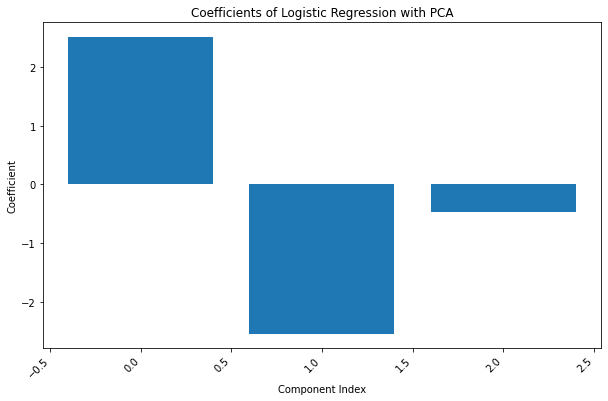

In [21]:
# Ottenere i coefficienti del modello
coefficients = log_model_pca.coef_[0]

# Plot dei coefficienti
plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), coefficients)
plt.title('Coefficients of Logistic Regression with PCA')
plt.xlabel('Component Index')
plt.ylabel('Coefficient')
plt.xticks(rotation=45, ha='right')
plt.show()

In [23]:
# Predictions on the training set
train_predictions_pca = log_model_pca.predict(X_train_pca)

# Accuracy on the training set
accuracy_train_pca = accuracy_score(Y_train, train_predictions_pca)

# Confusion matrix on the training set
conf_matrix_train_pca = confusion_matrix(Y_train, train_predictions_pca)

# Print metrics
print("Metrics for Training Set:")
print("Accuracy:", accuracy_train_pca)
print("Confusion Matrix:")
print(conf_matrix_train_pca)

Metrics for Training Set:
Accuracy: 0.9418837675350702
Confusion Matrix:
[[232  12]
 [ 17 238]]


In [26]:
# Predictions on the test set
test_predictions_pca = log_model_pca.predict(X_test_pca)

# Accuracy on the test set
accuracy_test_pca = accuracy_score(Y_test, test_predictions_pca)

# Confusion matrix on the test set
conf_matrix_test_pca = confusion_matrix(Y_test, test_predictions_pca)

# Print metrics
print("\nMetrics for Test Set:")
print("Accuracy:", accuracy_test_pca)
print("Confusion Matrix:")
print(conf_matrix_test_pca)


Metrics for Test Set:
Accuracy: 0.9069767441860465
Confusion Matrix:
[[104   9]
 [ 11  91]]


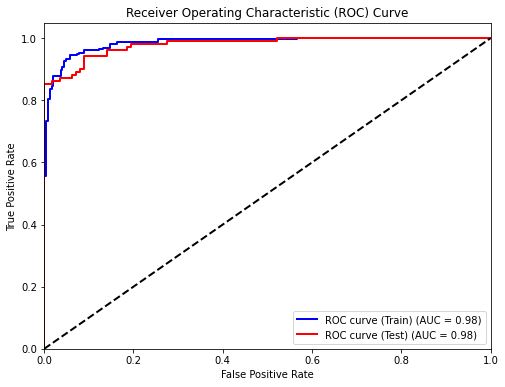

In [30]:
# Predict probabilities for ROC curve
train_predicted_probabilities_pca = log_model_pca.predict_proba(X_train_pca)[:, 1]
test_predicted_probabilities_pca = log_model_pca.predict_proba(X_test_pca)[:, 1]

# Calculate ROC curve and AUC for training set
fpr_train_pca, tpr_train_pca, _ = roc_curve(Y_train, train_predicted_probabilities_pca)
roc_auc_train_pca = auc(fpr_train_pca, tpr_train_pca)

# Calculate ROC curve and AUC for test set
fpr_test_pca, tpr_test_pca, _ = roc_curve(Y_test, test_predicted_probabilities_pca)
roc_auc_test_pca = auc(fpr_test_pca, tpr_test_pca)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_pca, tpr_train_pca, color='blue', lw=2, label='ROC curve (Train) (AUC = %0.2f)' % roc_auc_train_pca)
plt.plot(fpr_test_pca, tpr_test_pca, color='red', lw=2, label='ROC curve (Test) (AUC = %0.2f)' % roc_auc_test_pca)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()